# The E-M Algorithm

### The Expectation-Maximization (EM) algorithm is a statistical technique
1. Expectation (E) Step: the algorithm calculates the expected values for the missing variables. It computes the probability distribution of the missing data. 
2. Maximization (M) Step: the algorithm updates the parameters of the model to maximize the likelihood of the observed data. This involves finding the parameter values that maximize the expected likelihood computed in the E-step.
3. Iteration: Steps 1 and 2 are repeated iteratively until convergence, where the parameters no longer change significantly between iterations or a predefined stopping criterion is met.

#### Start by importing the important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset and denfine (x , y) variables

#### Chosen Dataset: Breast Cancer (based on personal interest)

In [2]:
# Load breast cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
# Specify the X and y (Target and features)
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = pd.Series(data.target, name='target')                # Target

In [4]:
# Print values of X
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
# Print values of y
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

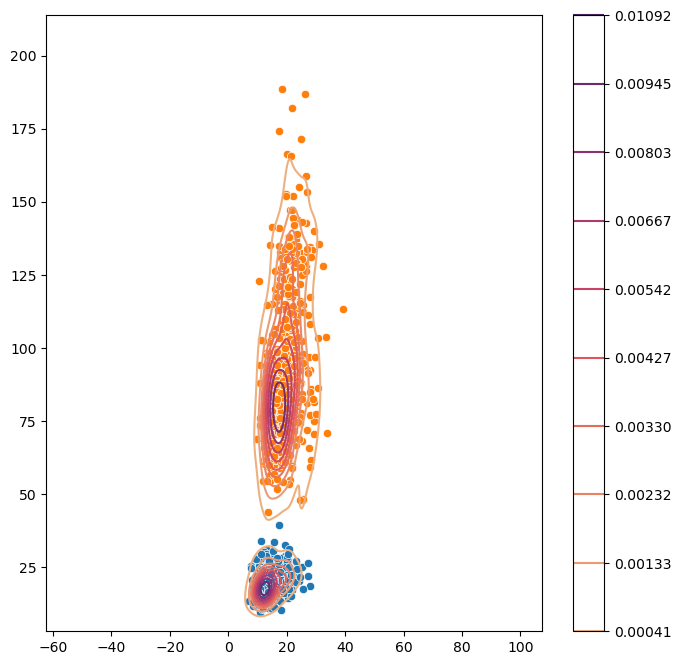

In [43]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = X[:,0], y = X[:,1])
sns.scatterplot(x = X[:,1], y = X[:,2])
sns.kdeplot(x = X[:,0], y = X[:,1], bw_adjust = 1.5, cmap = 'flare', cbar = True)
sns.kdeplot(x = X[:,1], y = X[:,2], cmap = 'flare')
plt.axis('equal')
plt.show()

### Import GMM from sickit-learn 

In [6]:
from sklearn.mixture import GaussianMixture

In [7]:
gmm = GaussianMixture(n_components = 2, verbose = 2, verbose_interval = 1)

### Fit the model

In [8]:
gmm.fit(X) 

Initialization 0
  Iteration 1	 time lapse 0.06915s	 ll change inf
  Iteration 2	 time lapse 0.00092s	 ll change 0.06126
  Iteration 3	 time lapse 0.00074s	 ll change 0.00773
  Iteration 4	 time lapse 0.00071s	 ll change 0.00336
  Iteration 5	 time lapse 0.00071s	 ll change 0.02993
  Iteration 6	 time lapse 0.00069s	 ll change 0.08431
  Iteration 7	 time lapse 0.00070s	 ll change 0.03745
  Iteration 8	 time lapse 0.00070s	 ll change 0.01810
  Iteration 9	 time lapse 0.00072s	 ll change 0.01049
  Iteration 10	 time lapse 0.00071s	 ll change 0.00766
  Iteration 11	 time lapse 0.00069s	 ll change 0.02329
  Iteration 12	 time lapse 0.00087s	 ll change 0.06348
  Iteration 13	 time lapse 0.00089s	 ll change 0.10063
  Iteration 14	 time lapse 0.00093s	 ll change 0.17292
  Iteration 15	 time lapse 0.00100s	 ll change 0.21093
  Iteration 16	 time lapse 0.00081s	 ll change 0.19645
  Iteration 17	 time lapse 0.00072s	 ll change 0.17342
  Iteration 18	 time lapse 0.00070s	 ll change 0.02529
  Iter

GaussianMixture(n_components=2, verbose=2, verbose_interval=1)

### Find the: wieghts, covariances and means

1. The first component has a weight of approximately 0.6384, which means it contributes about 63.84% to the overall distribution.
2. The second component has a weight of approximately 0.3616, accounting for about 36.16% of the overall distribution.

In [9]:
weights = gmm.weights_
weights

array([0.63837544, 0.36162456])

1. The array has a shape of (2, 30), indicating that there are two components and each component has 30 mean values.
2. The first component has mean values ranging from approximately 12.16 to 23.82 for different variables.
3. The second component has mean values ranging from approximately 17.60 to 28.96

In [10]:
means = gmm.means_
means

array([[1.21625159e+01, 1.81117822e+01, 7.81751817e+01, 4.64129320e+02,
        9.26691857e-02, 7.95351210e-02, 4.66280790e-02, 2.61352846e-02,
        1.74204234e-01, 6.27189069e-02, 2.89242932e-01, 1.23930447e+00,
        2.02597117e+00, 2.16631543e+01, 7.29671246e-03, 2.12101104e-02,
        2.61425809e-02, 1.00254128e-02, 2.05636974e-02, 3.60475269e-03,
        1.34048714e+01, 2.38160697e+01, 8.70998624e+01, 5.61493156e+02,
        1.25284263e-01, 1.79481980e-01, 1.65309729e-01, 7.49413320e-02,
        2.69640425e-01, 7.89783954e-02],
       [1.75957085e+01, 2.13689346e+01, 1.16319305e+02, 9.91637145e+02,
        1.02876168e-01, 1.48130748e-01, 1.63244155e-01, 8.91394718e-02,
        1.93444157e-01, 6.29365440e-02, 6.09821615e-01, 1.17722062e+00,
        4.34906577e+00, 7.33021385e+01, 6.58953275e-03, 3.30124849e-02,
        4.20461896e-02, 1.49219947e-02, 2.05045237e-02, 4.13057753e-03,
        2.13255680e+01, 2.89627155e+01, 1.42852023e+02, 1.44387232e+03,
        1.44874555e-01,

The covariance matrix describes the relationships and variances among the variables. 

In [11]:
cov = gmm.covariances_
cov

array([[[ 3.10644467e+00,  3.27457745e-01,  2.05483026e+01, ...,
          2.73009717e-02, -1.13442022e-02, -8.15984610e-03],
        [ 3.27457745e-01,  1.64270114e+01,  2.03641433e+00, ...,
         -8.87678969e-03, -1.91914024e-02, -5.39237502e-03],
        [ 2.05483026e+01,  2.03641433e+00,  1.36776827e+02, ...,
          2.01823799e-01, -6.83069578e-02, -4.59921150e-02],
        ...,
        [ 2.73009717e-02, -8.87678969e-03,  2.01823799e-01, ...,
          1.30635397e-03,  3.57872941e-04,  1.95978037e-04],
        [-1.13442022e-02, -1.91914024e-02, -6.83069578e-02, ...,
          3.57872941e-04,  1.72176062e-03,  1.71922481e-04],
        [-8.15984610e-03, -5.39237502e-03, -4.59921150e-02, ...,
          1.95978037e-04,  1.71922481e-04,  1.80169618e-04]],

       [[ 9.95329424e+00,  1.67185697e+00,  6.72980086e+01, ...,
          4.72509940e-02, -7.72978713e-02, -3.19975477e-02],
        [ 1.67185697e+00,  1.52939747e+01,  1.21614303e+01, ...,
          1.80745198e-02, -6.48824117e

### Plotting the GMM components:

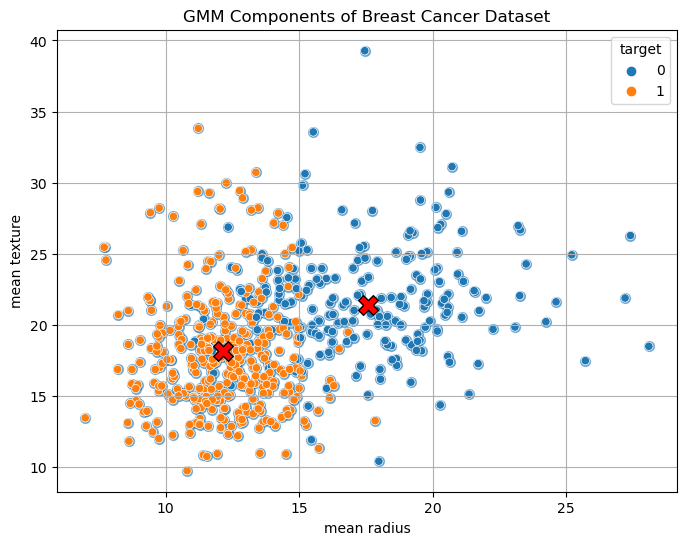

In [20]:
# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.5)
sns.scatterplot(data=X, x=X[:, 0], y=X[:, 1], hue=y)

# Plot the means of the Gaussian components
plt.scatter(means[:, 0], means[:, 1], c='red', s=200, marker='X', edgecolor='black')

plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('GMM Components of Breast Cancer Dataset')
plt.grid(True)
plt.show()

### Using the GMM as a classifier
#### Run the EM algorithm 100 times and select the best one


In [22]:
gmm = GaussianMixture(n_components = 2, n_init = 100, verbose = 0)
gmm.fit(X)

GaussianMixture(n_components=2, n_init=100)

### Find the final log likelihood after convergence

The log likelihood value of 39.04573047088977 indicates how well the Gaussian Mixture Model (GMM) fits the observed data. 

In [21]:
ll = gmm.lower_bound_      
print('The returned gmm has a log likelihood of', ll)

The returned gmm has a log likelihood of 39.04573047088977


### Predict the variables 

In [23]:
y_pred_components = gmm.predict(X)
y_pred_components

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

### Plotting the GMM Components with Predicted Variables

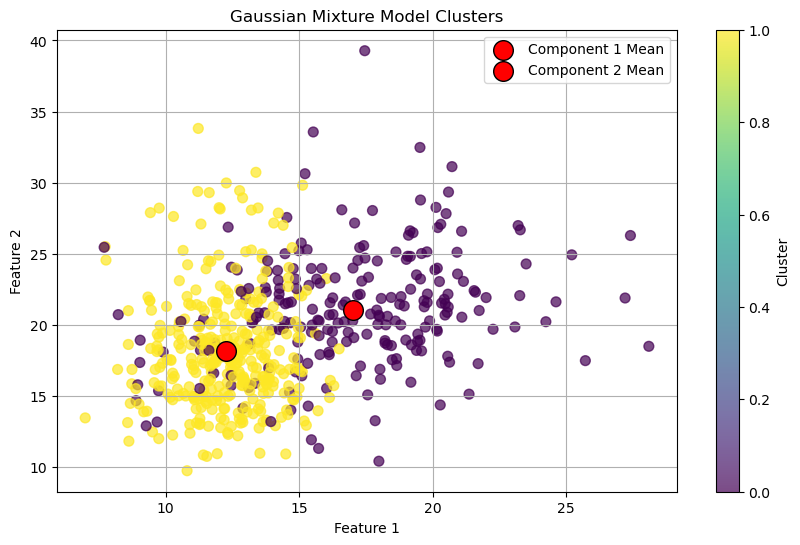

In [46]:
labels = gmm.predict(X)

# Visualize the GMM components
plt.figure(figsize=(10, 6))

# Scatter plot of the data points colored by the GMM cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('Gaussian Mixture Model Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plotting the means of the Gaussian components
for i in range(n_components):
    plt.scatter(gmm.means_[i, 0], gmm.means_[i, 1], color='red', s=200, marker='o', edgecolor='black', label=f'Component {i+1} Mean')

plt.legend()
plt.grid(True)
plt.show()

- The colours of the circles show the groundtruth labels, while the coloured  show the predicted GMM component numbers.
- And the red colored circle shows the mean value of each component.

In [18]:
prob = gmm.predict_proba(X)
prob

array([[1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 5.31098275e-230],
       [1.00000000e+000, 6.70353600e-139],
       ...,
       [9.99999687e-001, 3.13419084e-007],
       [1.00000000e+000, 1.38223988e-136],
       [1.06664545e-048, 1.00000000e+000]])

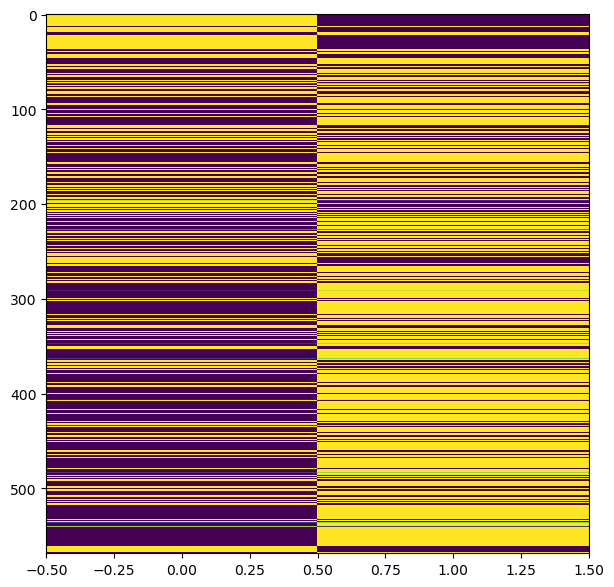

In [19]:
plt.figure(figsize = (7,7))
plt.imshow(prob, aspect = 'auto', interpolation = 'nearest')
plt.show()